#Capstone Project#
Prediction of Student Drop out


##Import Library##

In [ ]:
# Import Library
# Mount Google Drive untuk akses file
from google.colab import drive
drive.mount('/content/drive')

# Install XGBoost (jika belum terinstall)
!pip install xgboost

# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import shap

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Menyimpan model (optional)
import joblib


# Pengaturan tampilan
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

Mounted at /content/drive


##Load Dataset##
Dataset berasal dari UCI Student Performance (https://archive.ics.uci.edu/dataset/320/student+performance)

In [ ]:
# Load Data
file_path = '/content/drive/My Drive/Capstone/Dataset/data_student-langp.csv'
df = pd.read_csv(file_path)

- Explorasi Data Awal

  Untuk mengetahui isi dataset

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Data Overview dan Cleaning ##

- Data Overview & Data Cleaning Awal

  Mengetahui jumlah baris, kolom dan tipe data
  
  Mengecek missing value
  
  Mengecek statistik deskripsi

In [ ]:
# Data Overview & Data Cleaning Awal
# Ukuran dataset
print("Dataset shape:", df.shape)

# Informasi tipe data & missing value
print("\nInfo dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

Dataset shape: (649, 33)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery   

- Data Cleaning (lanjutan) dan Pelabelan Dropout

  Pengecekan dan penghapusan duplikat

  Pembuatan label dropout, karena label dropout tidak terdapat secara alami pada dataset sehingga dibuat dengan mengambil nilai G3, jika kurang dari 10 maka terlabel dropout

  Pengecekan distribusi label dropout

In [ ]:
# Data Cleaning Lanjutan + Label Dropout
# Cek dan hapus duplikat
print("Jumlah duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

# Buat kolom label dropout (1 = dropout, 0 = tidak)
df['dropout'] = df['G3'].apply(lambda x: 1 if x < 10 else 0)

# Cek distribusi label
print("\nDistribusi label dropout:")
print(df['dropout'].value_counts())

Jumlah duplikat: 0

Distribusi label dropout:
dropout
0    549
1    100
Name: count, dtype: int64


## Future Engineering ##

- Melakukan rerata nilai siswa
- Melakukan rata-rata pendiidkan orang tua siswa
- Pengecekan hasil

In [ ]:
# Feature Engineering
# Rata-rata nilai dari G1, G2, G3
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Rata-rata pendidikan orang tua
df['parent_edu'] = df[['Medu', 'Fedu']].mean(axis=1)

# Cek data hasil engineering
df[['G1', 'G2', 'G3', 'avg_grade', 'Medu', 'Fedu', 'parent_edu']].head()

,G1,G2,G3,avg_grade,Medu,Fedu,parent_edu
0,0,11,11,7.333333,4,4,4.0
1,9,11,11,10.333333,1,1,1.0
2,12,13,12,12.333333,1,1,1.0
3,14,14,14,14.000000,4,2,3.0
4,11,13,13,12.333333,3,3,3.0


## Exploratory Data Analysis ##

Explorasi dilakukan untuk melihat data statistik secara visual

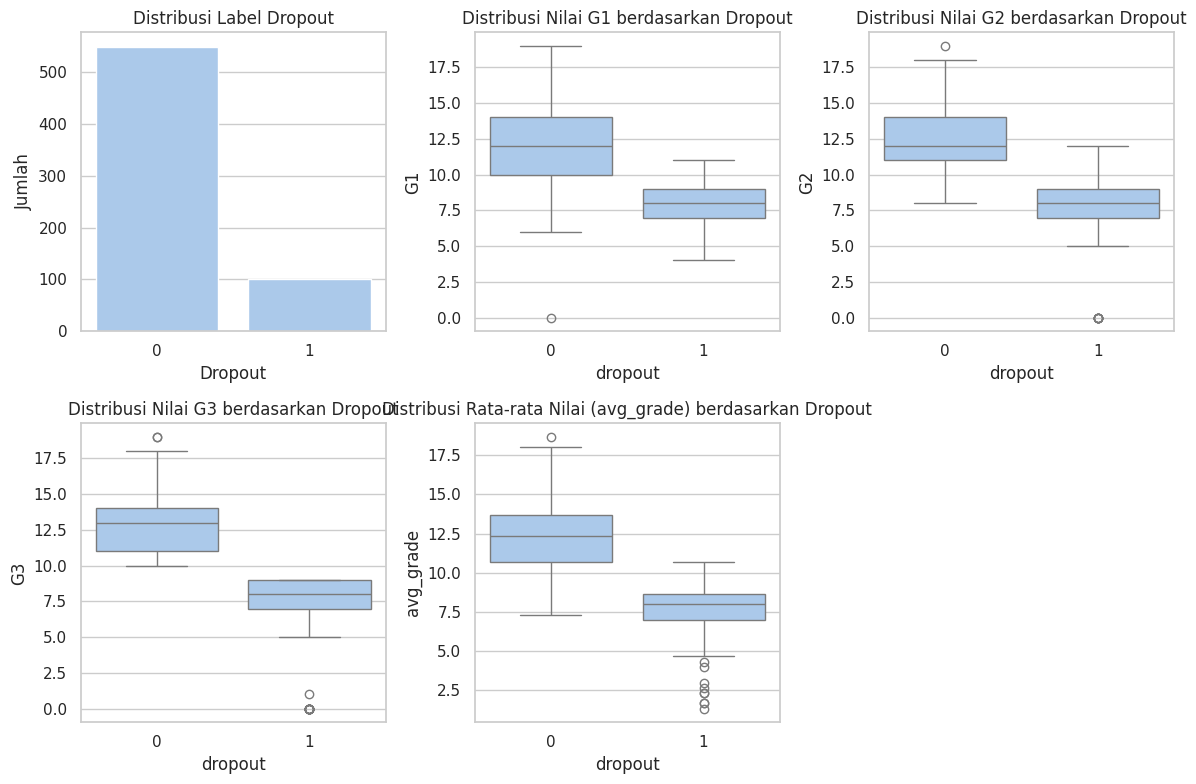

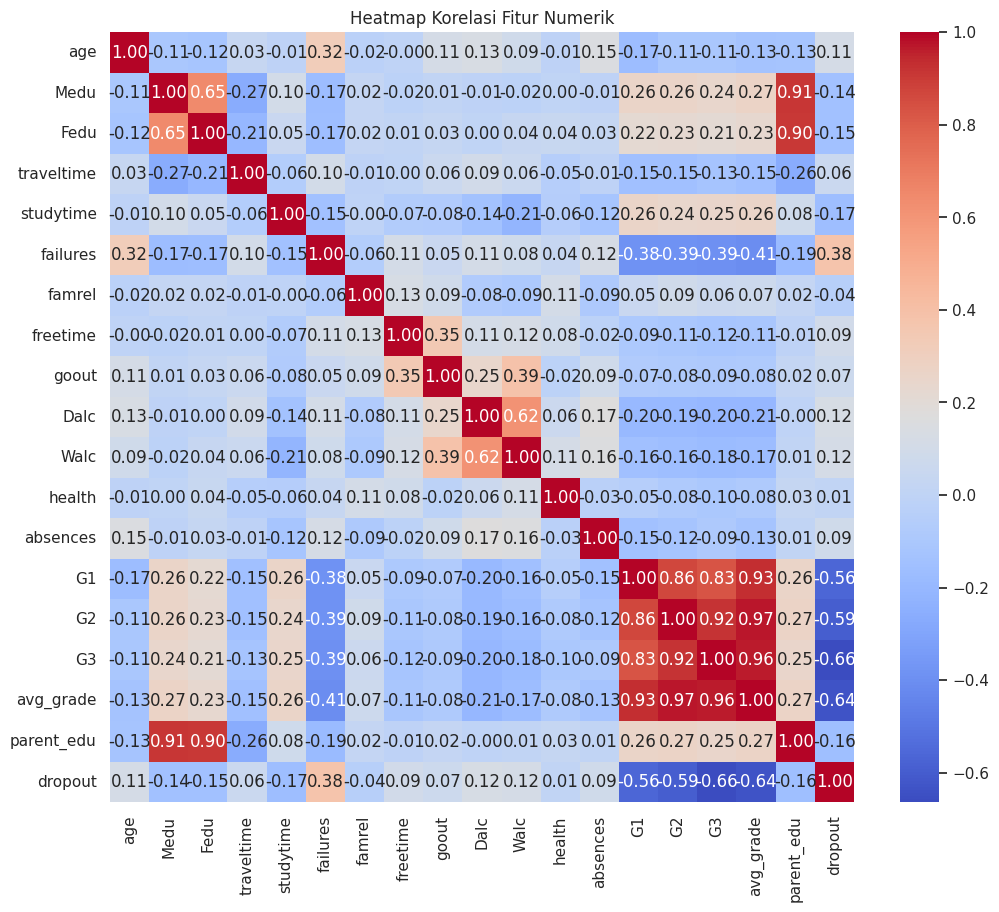

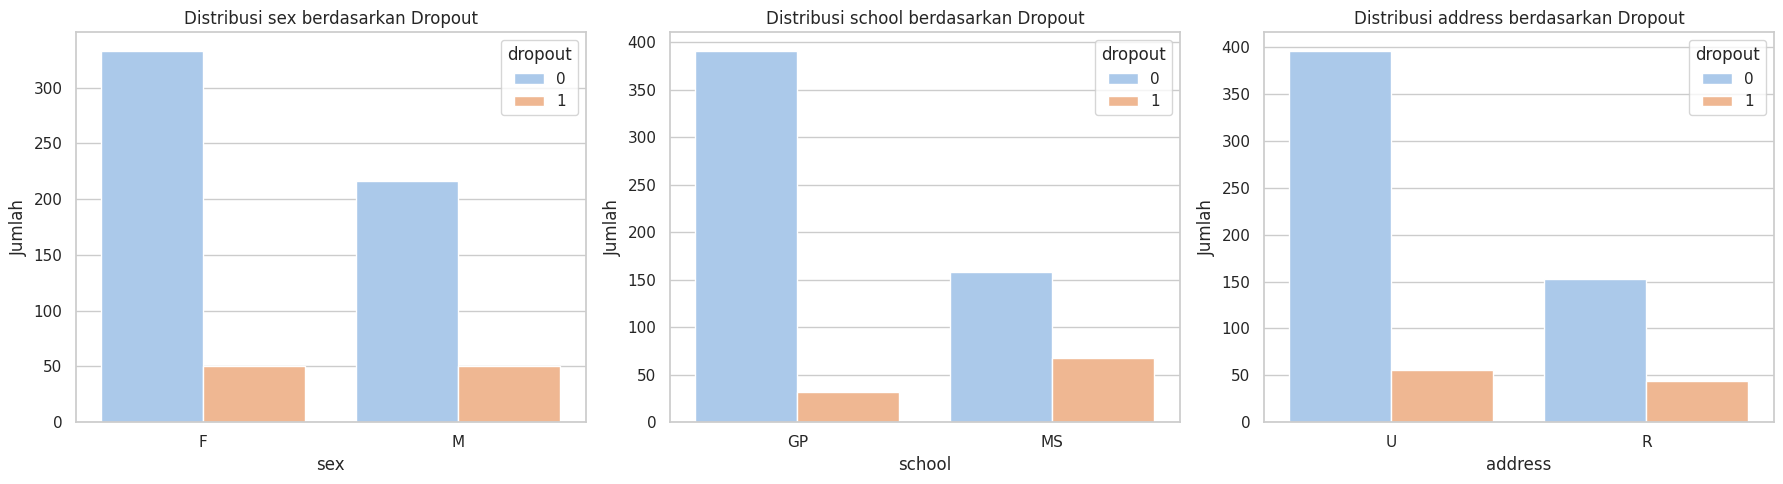

In [ ]:
# Exploratory Data Analysis (EDA) — Analisis dan Visualisasi Data

sns.set_style('whitegrid')
sns.set_palette('pastel')

# Ukuran figure standar
plt.figure(figsize=(12, 8))

# 1. Distribusi label dropout
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='dropout')
plt.title('Distribusi Label Dropout')
plt.xlabel('Dropout')
plt.ylabel('Jumlah')

# 2. Boxplot nilai G1, G2, G3 per dropout
plt.subplot(2, 3, 2)
sns.boxplot(x='dropout', y='G1', data=df)
plt.title('Distribusi Nilai G1 berdasarkan Dropout')

plt.subplot(2, 3, 3)
sns.boxplot(x='dropout', y='G2', data=df)
plt.title('Distribusi Nilai G2 berdasarkan Dropout')

plt.subplot(2, 3, 4)
sns.boxplot(x='dropout', y='G3', data=df)
plt.title('Distribusi Nilai G3 berdasarkan Dropout')

plt.subplot(2, 3, 5)
sns.boxplot(x='dropout', y='avg_grade', data=df)
plt.title('Distribusi Rata-rata Nilai (avg_grade) berdasarkan Dropout')

plt.tight_layout()
plt.show()

# 3. Heatmap korelasi fitur numerik lengkap
plt.figure(figsize=(12,10))
corr_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                 'absences', 'G1', 'G2', 'G3', 'avg_grade', 'parent_edu', 'dropout']

sns.heatmap(df[corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# 4. Visualisasi variabel kategorikal vs dropout (pilih 3 contoh variabel)
cat_vars = ['sex', 'school', 'address']

plt.figure(figsize=(18,5))

for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=var, hue='dropout')
    plt.title(f'Distribusi {var} berdasarkan Dropout')
    plt.xlabel(var)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

Data Heatmap secara numerik

In [ ]:
# Menghitung korelasi antar fitur numerik
corr_matrix = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                  'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avg_grade',
                  'parent_edu', 'dropout']].corr()

# Tampilkan korelasi
print(corr_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.107832 -0.121050    0.034490  -0.008415  0.319968   
Medu       -0.107832  1.000000  0.647477   -0.265079   0.097006 -0.172210   
Fedu       -0.121050  0.647477  1.000000   -0.208288   0.050400 -0.165915   
traveltime  0.034490 -0.265079 -0.208288    1.000000  -0.063154  0.097730   
studytime  -0.008415  0.097006  0.050400   -0.063154   1.000000 -0.147441   
failures    0.319968 -0.172210 -0.165915    0.097730  -0.147441  1.000000   
famrel     -0.020559  0.024421  0.020256   -0.009521  -0.004127 -0.062645   
freetime   -0.004910 -0.019686  0.006841    0.000937  -0.068829  0.108995   
goout       0.112805  0.009536  0.027690    0.057454  -0.075442  0.045078   
Dalc        0.134768 -0.007018  0.000061    0.092824  -0.137585  0.105949   
Walc        0.086357 -0.019766  0.038445    0.057007  -0.214925  0.082266   
health     -0.008750  0.004614  0.044910   -0.048261  -0.056433  0.035588   

###Exploratory Data Analysis (EDA) Lanjutan###

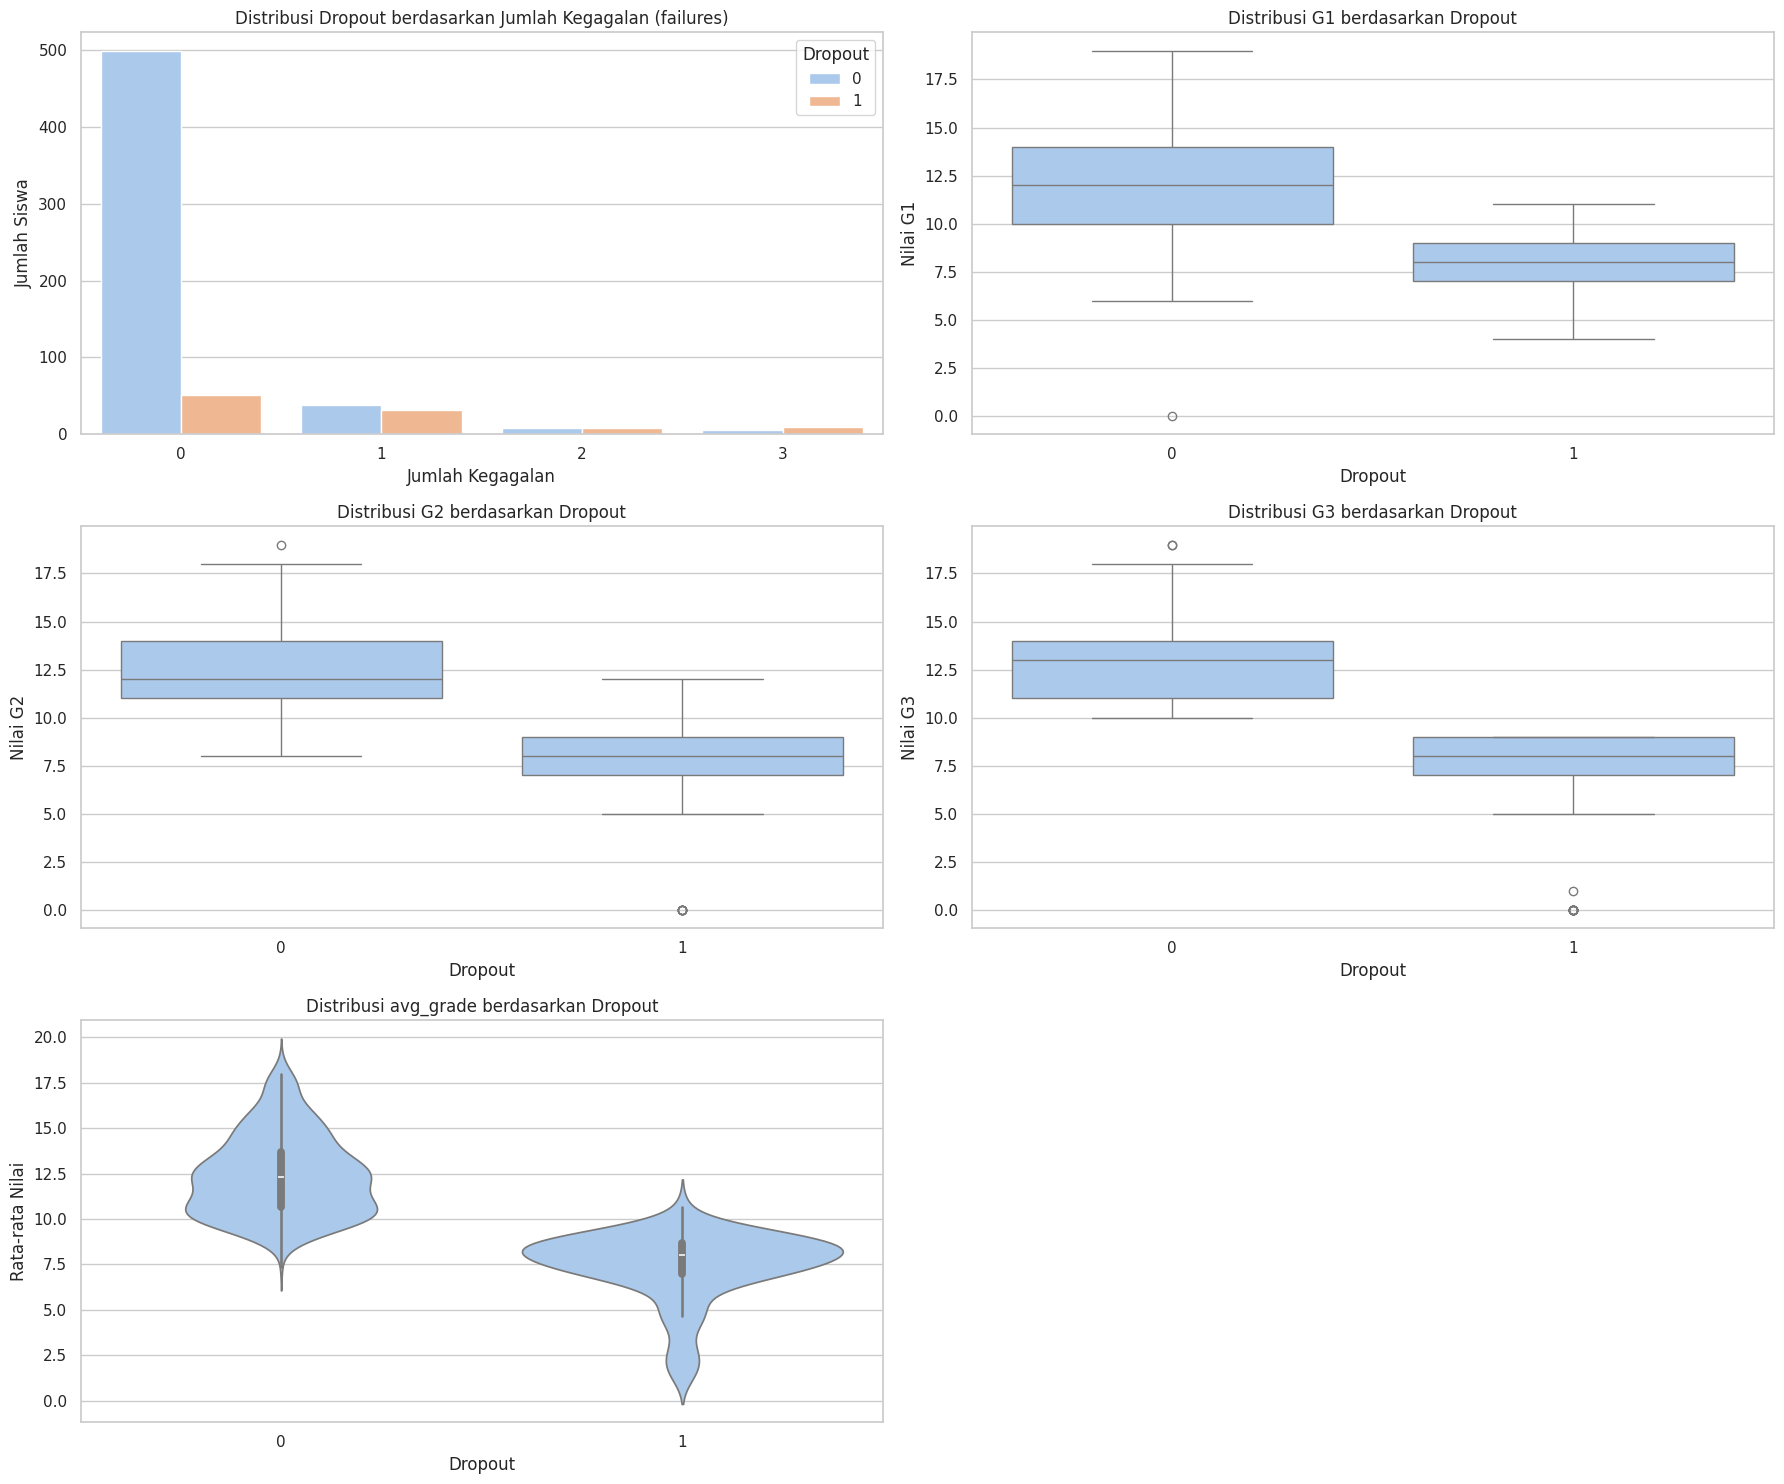

In [ ]:
# Exploratory Data Analysis (EDA) — Analisis dan Visualisasi Data lanjutan
plt.figure(figsize=(18, 15))

# 1. Barplot proporsi dropout berdasarkan jumlah kegagalan (failures)
plt.subplot(3,2,1)
sns.countplot(data=df, x='failures', hue='dropout')
plt.title('Distribusi Dropout berdasarkan Jumlah Kegagalan (failures)')
plt.xlabel('Jumlah Kegagalan')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Dropout')

# 2. Boxplot nilai G1, G2, G3 berdasarkan dropout
for i, grade in enumerate(['G1', 'G2', 'G3']):
    plt.subplot(3,2,i+2)
    sns.boxplot(data=df, x='dropout', y=grade)
    plt.title(f'Distribusi {grade} berdasarkan Dropout')
    plt.xlabel('Dropout')
    plt.ylabel(f'Nilai {grade}')

# 3. Violin plot avg_grade berdasarkan dropout
plt.subplot(3,2,5)
sns.violinplot(data=df, x='dropout', y='avg_grade')
plt.title('Distribusi avg_grade berdasarkan Dropout')
plt.xlabel('Dropout')
plt.ylabel('Rata-rata Nilai')

# 4. Pairplot fitur akademik dan failures (tidak bisa di-subplot, jadi dibuat terpisah)
plt.tight_layout()
plt.show()

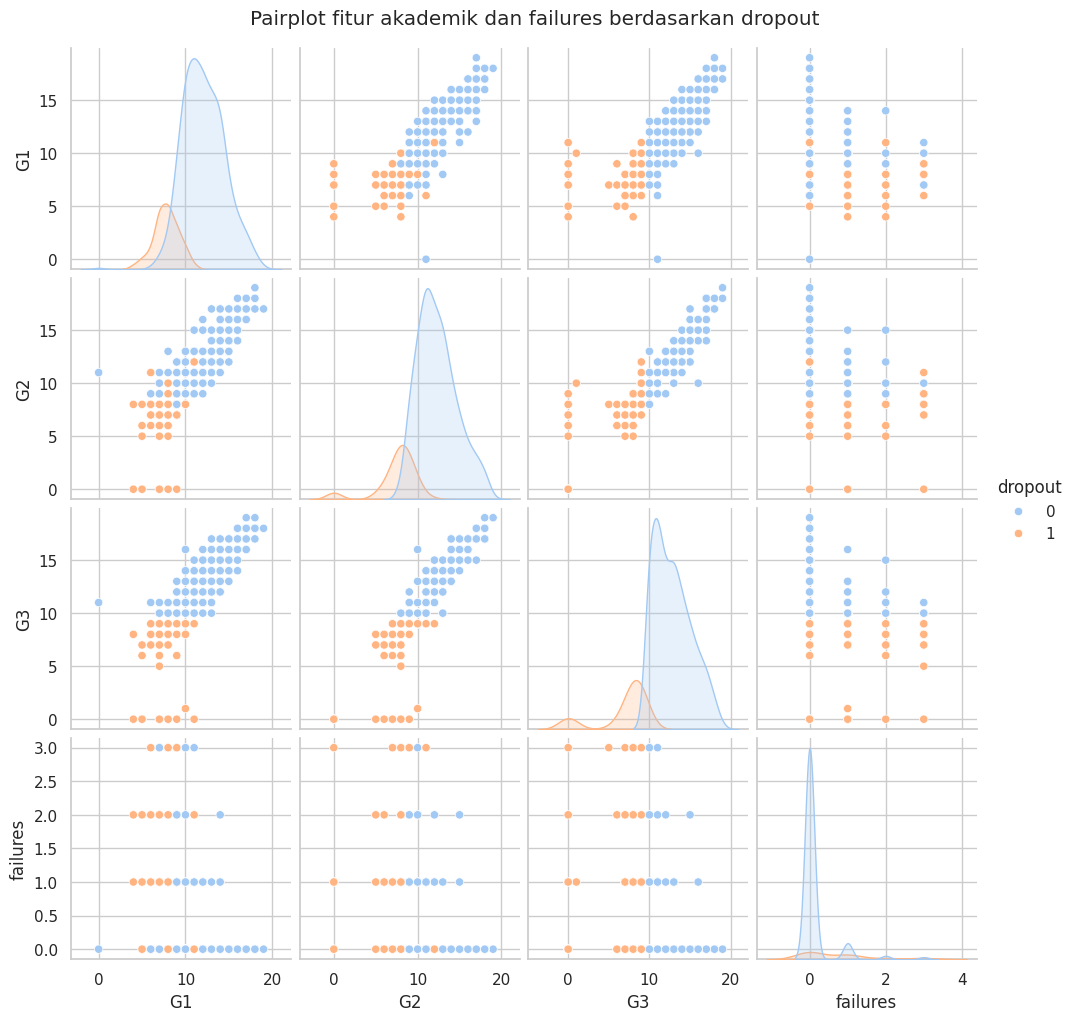

In [ ]:
# EDA Lanjutan
# Pairplot harus dijalankan terpisah karena ukurannya besar
sns.pairplot(df[['G1', 'G2', 'G3', 'failures', 'dropout']], hue='dropout', diag_kind='kde')
plt.suptitle('Pairplot fitur akademik dan failures berdasarkan dropout', y=1.02)
plt.show()

EDA Lanjutan

In [ ]:
# EDA (Lanjutan 1)

# 1. Proporsi dropout berdasarkan jumlah kegagalan (failures)
proporsi_failures_dropout = pd.crosstab(df['failures'], df['dropout'], normalize='index') * 100
print("Proporsi Dropout (%) berdasarkan Jumlah Kegagalan (failures):")
print(proporsi_failures_dropout.round(2), "\n")

# 2. Statistik deskriptif nilai G1, G2, G3 berdasarkan dropout
print("Statistik Deskriptif Nilai Akademik per Kelas Dropout:")
statistik_nilai = df.groupby('dropout')[['G1', 'G2', 'G3', 'avg_grade']].describe()
print(statistik_nilai, "\n")

# 3. Korelasi fitur akademik dan failures untuk siswa TIDAK dropout (dropout=0)
print("Korelasi fitur akademik dan failures untuk siswa TIDAK dropout:")
korelasi_tidak_dropout = df[df['dropout'] == 0][['G1', 'G2', 'G3', 'failures']].corr()
print(korelasi_tidak_dropout.round(3), "\n")

# 4. Korelasi fitur akademik dan failures untuk siswa dropout (dropout=1)
print("Korelasi fitur akademik dan failures untuk siswa dropout:")
korelasi_dropout = df[df['dropout'] == 1][['G1', 'G2', 'G3', 'failures']].corr()
print(korelasi_dropout.round(3))



Proporsi Dropout (%) berdasarkan Jumlah Kegagalan (failures):
dropout       0      1
failures              
0         90.71   9.29
1         54.29  45.71
2         50.00  50.00
3         35.71  64.29 

Statistik Deskriptif Nilai Akademik per Kelas Dropout:
            G1                                                       G2  \
         count       mean       std  min   25%   50%   75%   max  count   
dropout                                                                   
0        549.0  12.058288  2.389200  0.0  10.0  12.0  14.0  19.0  549.0   
1        100.0   7.780000  1.446556  4.0   7.0   8.0   9.0  11.0  100.0   

                    ...    G3       avg_grade                                 \
              mean  ...   75%   max     count       mean       std       min   
dropout             ...                                                        
0        12.306011  ...  14.0  19.0     549.0  12.394657  2.233456  7.333333   
1         7.530000  ...   9.0   9.0     100.0  

EDA Lanjutan

In [ ]:
# EDA (Lanjutan 2)
# Kolom kategorikal yang ingin dianalisis proporsi dropout per kategori
categorical_cols = ['sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher']

# Kolom numerik yang ingin dianalisis statistik per kelas dropout
numerical_cols = ['age', 'Medu', 'Fedu', 'studytime', 'health', 'absences']

print("=== Proporsi Dropout (%) berdasarkan Kategori ===")
for col in categorical_cols:
    proporsi = pd.crosstab(df[col], df['dropout'], normalize='index') * 100
    print(f"\nProporsi dropout berdasarkan {col}:")
    print(proporsi.round(2))

print("\n\n=== Statistik Deskriptif Numerik per Kelas Dropout ===")
stats_numerik = df.groupby('dropout')[numerical_cols].describe().T
print(stats_numerik)

=== Proporsi Dropout (%) berdasarkan Kategori ===

Proporsi dropout berdasarkan sex:
dropout      0      1
sex                  
F        86.95  13.05
M        81.20  18.80

Proporsi dropout berdasarkan address:
dropout      0      1
address              
R        77.66  22.34
U        87.61  12.39

Proporsi dropout berdasarkan famsize:
dropout      0      1
famsize              
GT3      83.37  16.63
LE3      87.50  12.50

Proporsi dropout berdasarkan Pstatus:
dropout      0      1
Pstatus              
A        85.00  15.00
T        84.53  15.47

Proporsi dropout berdasarkan Mjob:
dropout       0      1
Mjob                  
at_home   78.52  21.48
health    87.50  12.50
other     83.72  16.28
services  86.03  13.97
teacher   94.44   5.56

Proporsi dropout berdasarkan Fjob:
dropout       0      1
Fjob                  
at_home   83.33  16.67
health    86.96  13.04
other     85.29  14.71
services  81.77  18.23
teacher   91.67   8.33

Proporsi dropout berdasarkan reason:
dropout       

EDA Lanjutan

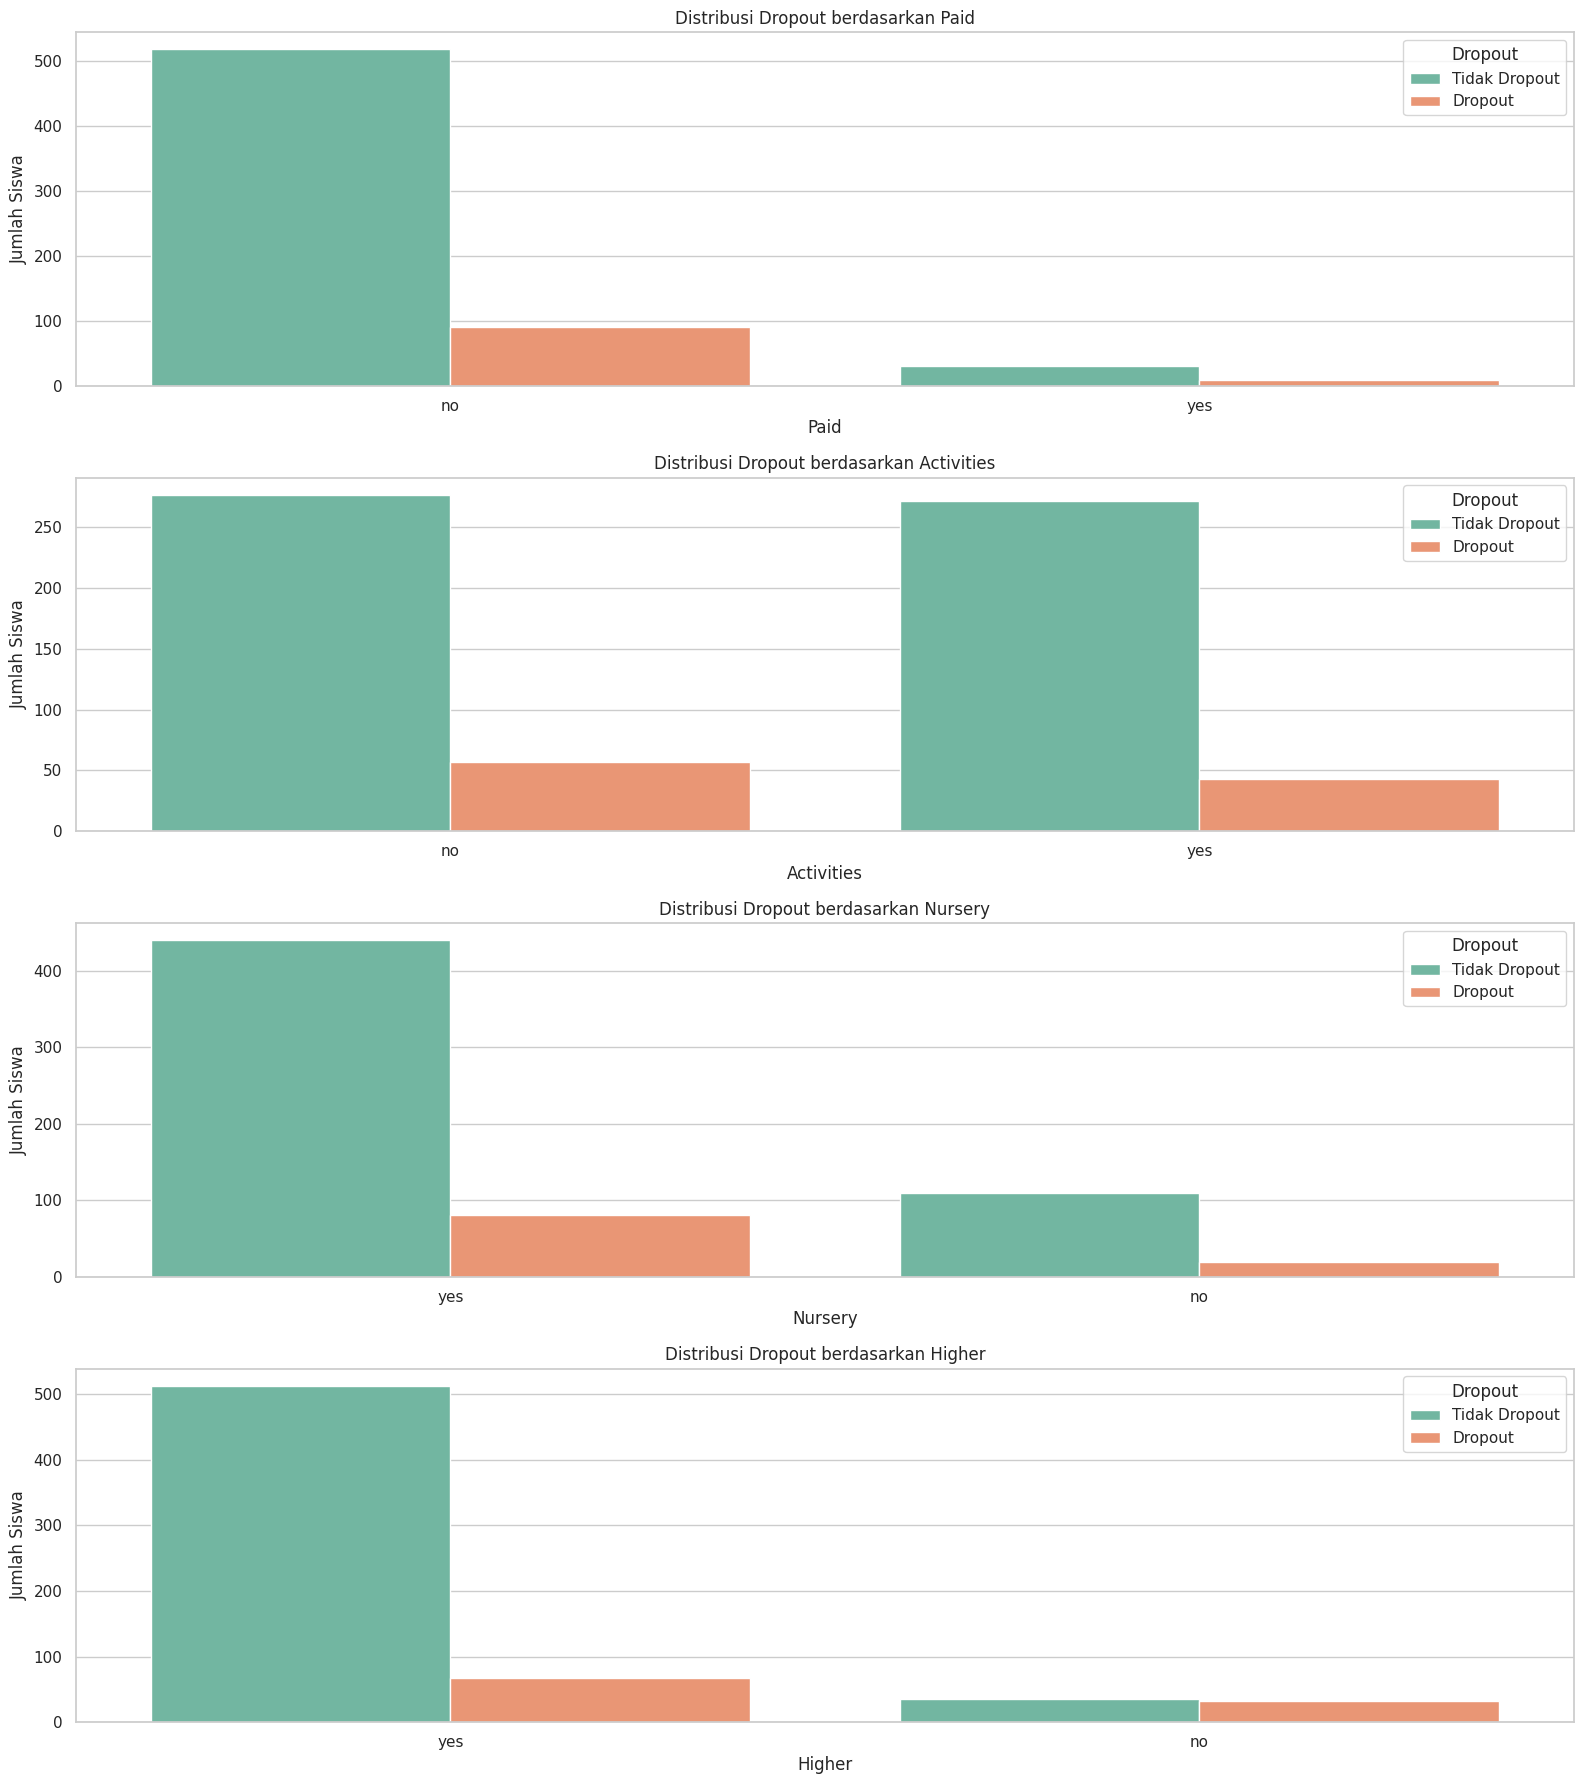

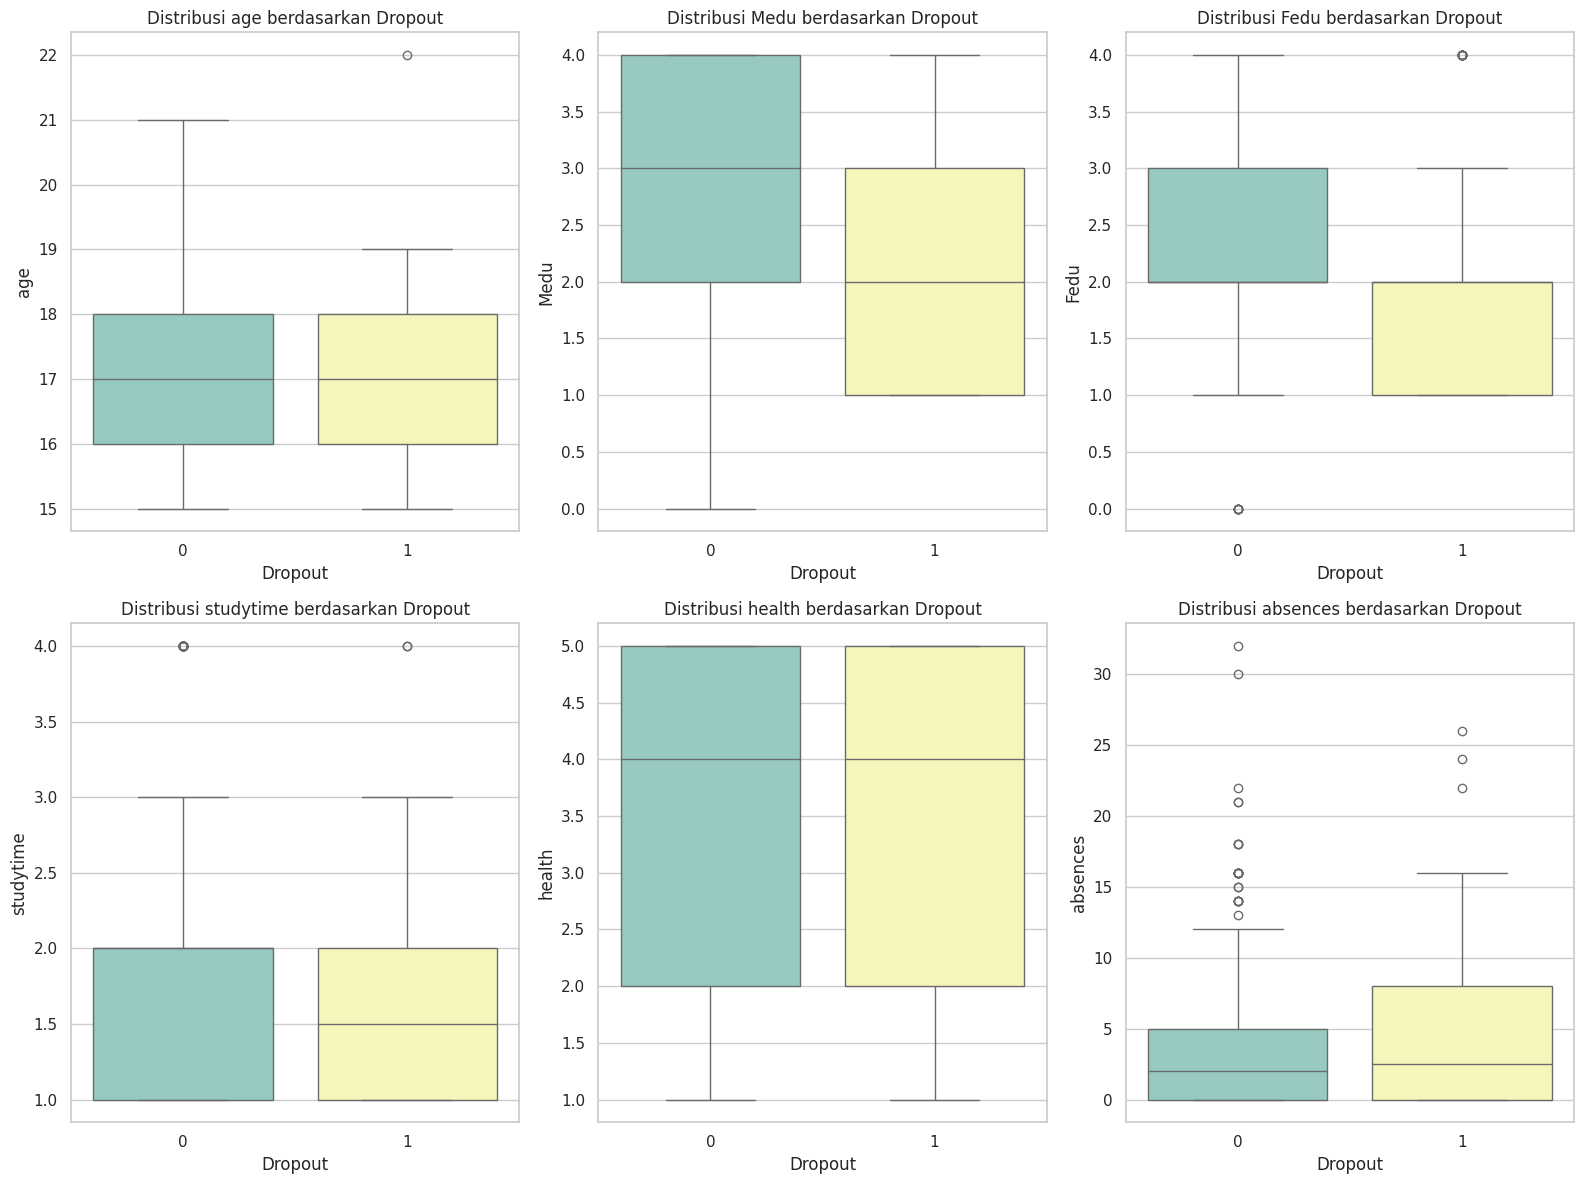

In [ ]:
# EDA (Lanjutan 3)
plt.figure(figsize=(16, 18))

# Visualisasi proporsi dropout berdasarkan fitur kategori
cat_features = ['paid', 'activities', 'nursery', 'higher']

for i, feature in enumerate(cat_features, 1):
    plt.subplot(4, 1, i)
    sns.countplot(data=df, x=feature, hue='dropout', palette='Set2')
    plt.title(f'Distribusi Dropout berdasarkan {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Jumlah Siswa')
    plt.legend(title='Dropout', labels=['Tidak Dropout', 'Dropout'])

plt.tight_layout()
plt.show()

# Visualisasi statistik fitur numerik dengan boxplot per kelas dropout
num_features = ['age', 'Medu', 'Fedu', 'studytime', 'health', 'absences']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='dropout', y=feature, palette='Set3')
    plt.title(f'Distribusi {feature} berdasarkan Dropout')
    plt.xlabel('Dropout')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## Model Experiment Awal

Model Experiment Ke 1

Melakukan modeling experiment dengan alogaritma yang berbeda

Model: Logistic Regression
Confusion Matrix:
 [[108   2]
 [  2  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       110
           1       0.90      0.90      0.90        20

    accuracy                           0.97       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.97      0.97      0.97       130

Accuracy: 0.9692 | Precision: 0.9000 | Recall: 0.9000 | F1-Score: 0.9000
--------------------------------------------------
Model: Random Forest
Confusion Matrix:
 [[110   0]
 [  0  20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        20

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Accuracy: 1.0000 | Precision: 1.0000 | Rec

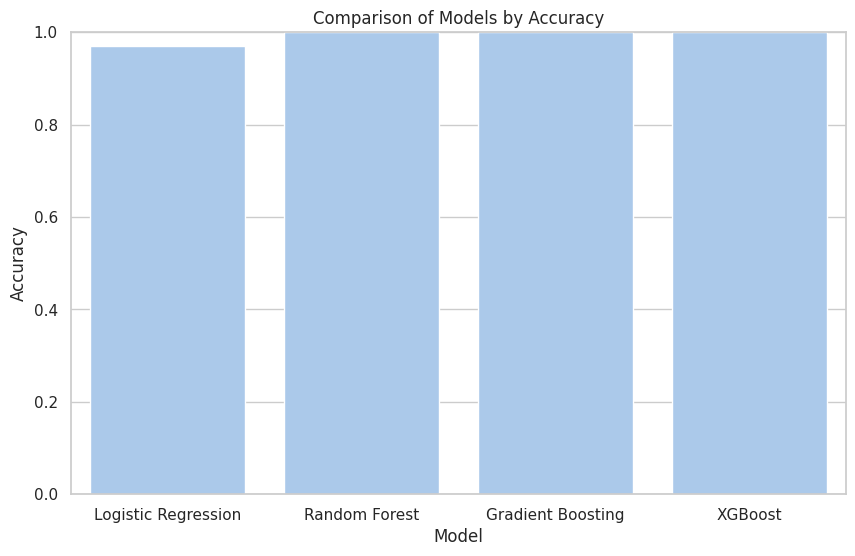

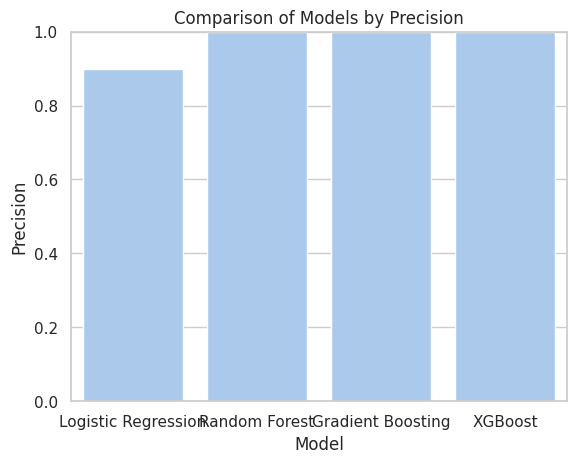

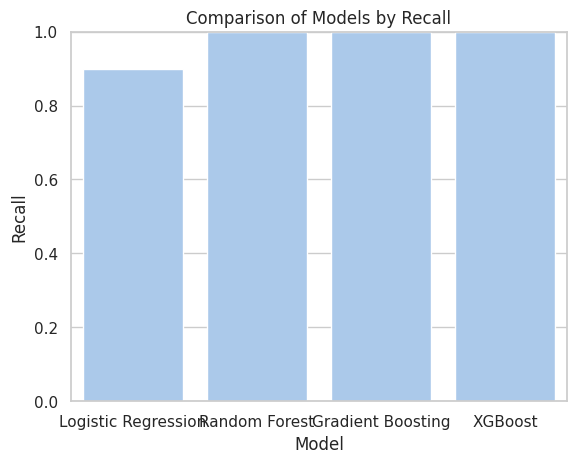

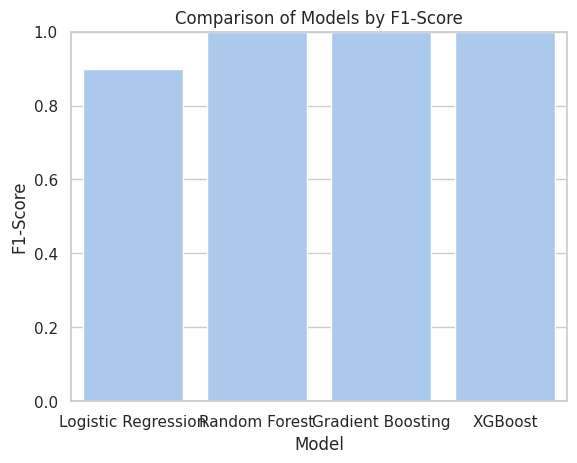

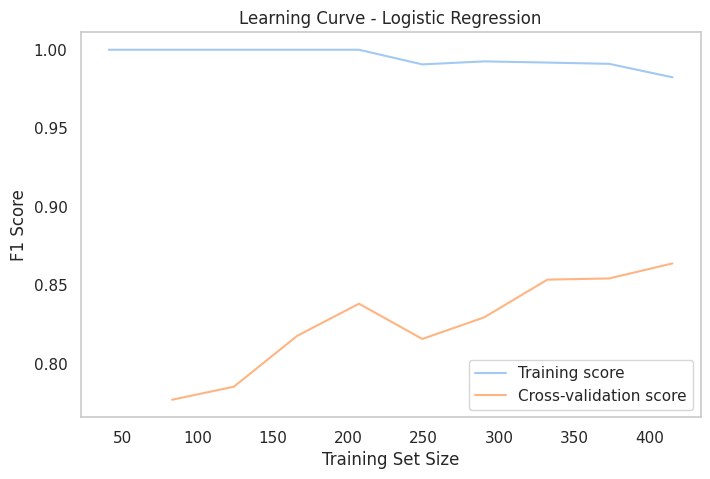

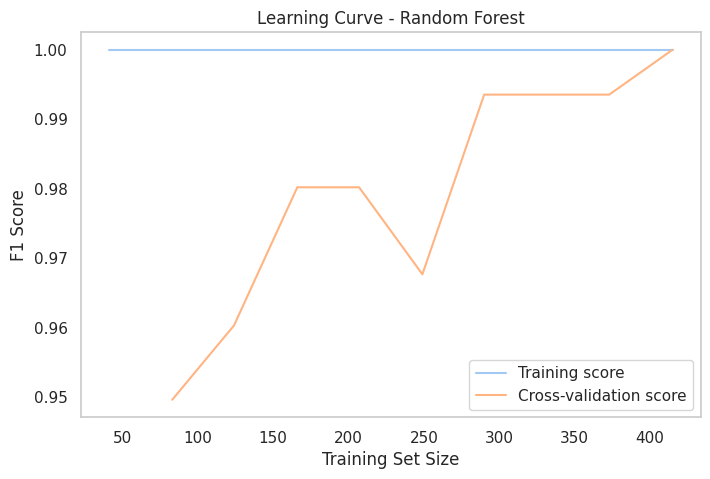

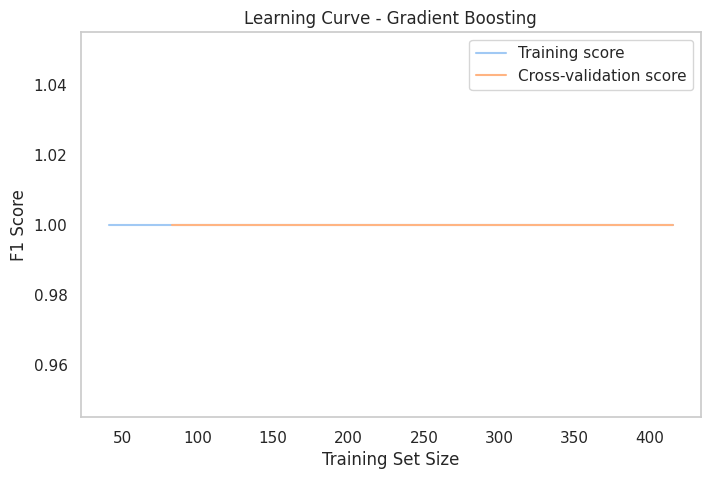

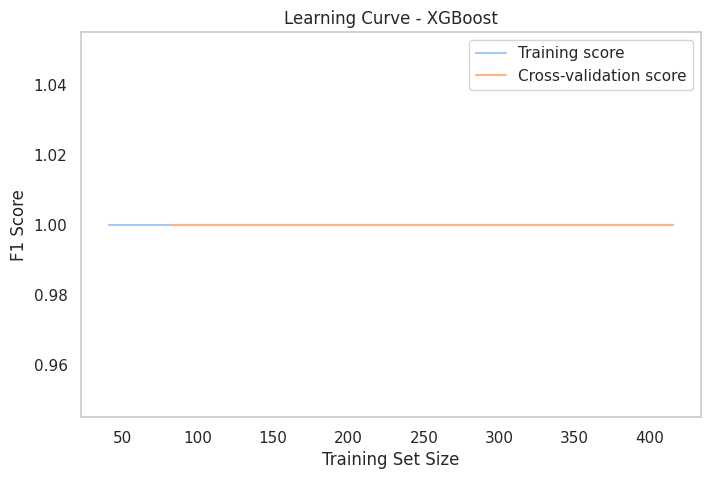

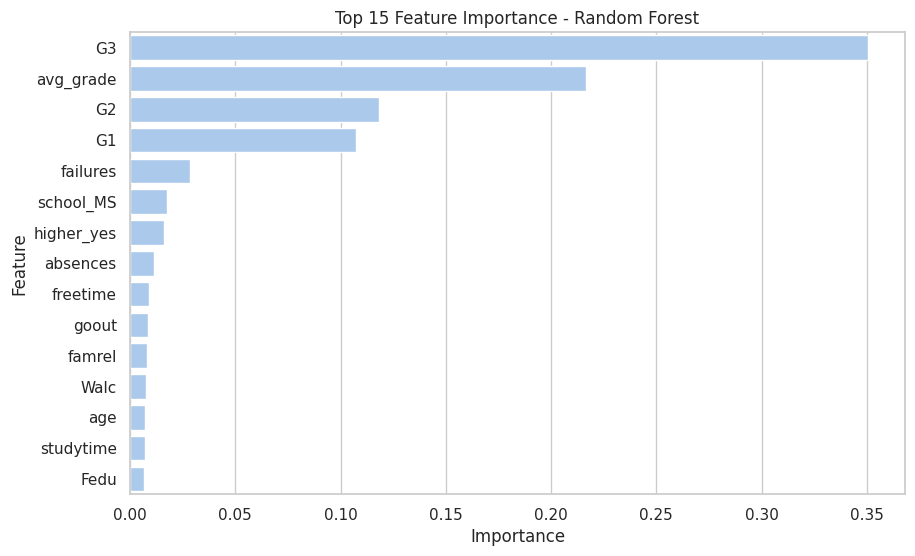

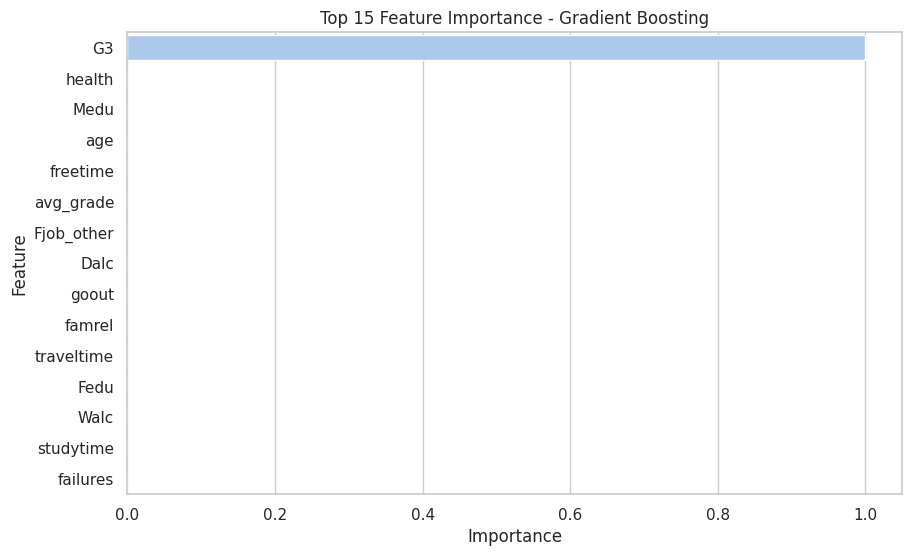

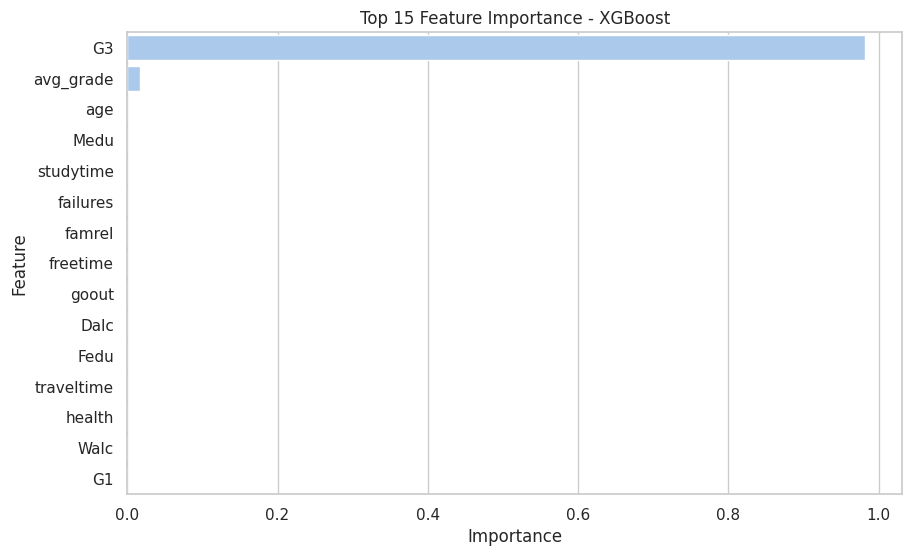

In [ ]:
# 1. Pisahkan fitur dan target
X = df.drop(columns=['dropout'])
y = df['dropout']

# 2. Identifikasi tipe kolom
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Buat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# 4. Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Definisikan model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 6. Fungsi training dan evaluasi model
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Buat pipeline lengkap
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")
    print("-"*50)

    return {"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}, clf

# 7. Evaluasi semua model dan simpan hasil
results = []
pipelines = {}

for name, model in models.items():
    res, pipe = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(res)
    pipelines[name] = pipe

df_results = pd.DataFrame(results)
print(df_results)

# 8. Visualisasi perbandingan performa model
plt.figure(figsize=(10,6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=df_results)
    plt.title(f'Comparison of Models by {metric}')
    plt.ylim(0,1)
    plt.show()

# 9. Visualisasi learning curve untuk tiap model
def plot_learning_curve(pipeline, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='f1', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

for name, pipe in pipelines.items():
    plot_learning_curve(pipe, X_train, y_train, name)

# 10. Feature importance untuk model ensemble (Random Forest, Gradient Boosting, XGBoost)
def plot_feature_importance(pipe, model_name):
    # Ambil fitur numerik dan fitur one-hot hasil encoding
    ohe = pipe.named_steps['preprocessor'].named_transformers_['cat']
    ohe_features = ohe.get_feature_names_out(categorical_cols)
    all_features = numerical_cols + list(ohe_features)

    model = pipe.named_steps['classifier']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        fi_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
        fi_df = fi_df.sort_values(by='Importance', ascending=False).head(15)
        plt.figure(figsize=(10,6))
        sns.barplot(x='Importance', y='Feature', data=fi_df)
        plt.title(f'Top 15 Feature Importance - {model_name}')
        plt.show()

for model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    plot_feature_importance(pipelines[model_name], model_name)

- Evaluasi model experiment

In [ ]:


for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipe, X, y, cv=5, scoring='f1')
    print(f"{name} CV F1-Score: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression CV F1-Score: 0.8423 ± 0.0599
Random Forest CV F1-Score: 0.9853 ± 0.0192
Gradient Boosting CV F1-Score: 1.0000 ± 0.0000
XGBoost CV F1-Score: 1.0000 ± 0.0000


Modeling Alogaritma dengan visualiasi

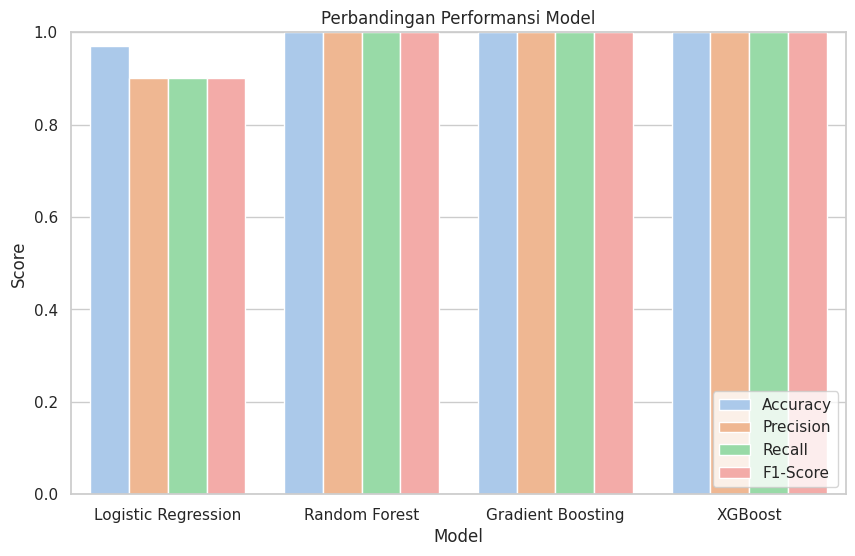

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.969231        0.9     0.9       0.9
1        Random Forest  1.000000        1.0     1.0       1.0
2    Gradient Boosting  1.000000        1.0     1.0       1.0
3              XGBoost  1.000000        1.0     1.0       1.0


In [ ]:
# Preprosessing dan modelling

# 1. Siapkan data: misal df sudah ada dan kolom target 'dropout'
# Pisahkan fitur dan target
X = df.drop(columns=['dropout'])
y = df['dropout']

# 2. Identifikasi tipe kolom
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Buat preprocessor untuk numeric dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# 4. Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Definisikan model yang akan diuji
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 6. Simpan hasil evaluasi tiap model
results = []

for name, model in models.items():
    # Buat pipeline preprocessing + modeling
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    # Train model
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Simpan hasil
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1})

# 7. Buat dataframe hasil evaluasi
df_results = pd.DataFrame(results)

# 8. Visualisasi perbandingan performa model
plt.figure(figsize=(10,6))
df_results_melt = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=df_results_melt)
plt.title('Perbandingan Performansi Model')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

# 9. Tampilkan tabel hasil evaluasi
print(df_results)


### Pengecekan data model experiment

Pengecekan data leakage

In [ ]:
# Step 1: Cek dan hapus data leakage
dropout_df = df.copy()

# Cek kolom yang berpotensi leakage
print(dropout_df[['G1', 'G2', 'G3', 'dropout']].corr())

# Drop G3 sebagai target
dropout_df = dropout_df.drop(columns=['G3'])

# (Opsional) Drop juga G1 dan G2 untuk baseline non-akademik
# dropout_df = dropout_df.drop(columns=['G1', 'G2'])

               G1        G2        G3   dropout
G1       1.000000  0.864982  0.826387 -0.563070
G2       0.864982  1.000000  0.918548 -0.592251
G3       0.826387  0.918548  1.000000 -0.663157
dropout -0.563070 -0.592251 -0.663157  1.000000


Pengecekan Heatmap

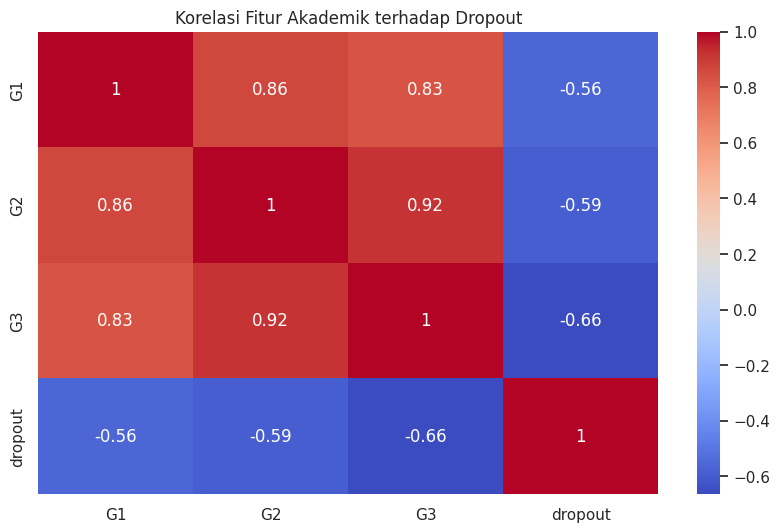

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['G1', 'G2', 'G3', 'dropout']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Akademik terhadap Dropout")
plt.show()

Pengecekan droput

dropout
0    549
1    100
Name: count, dtype: int64


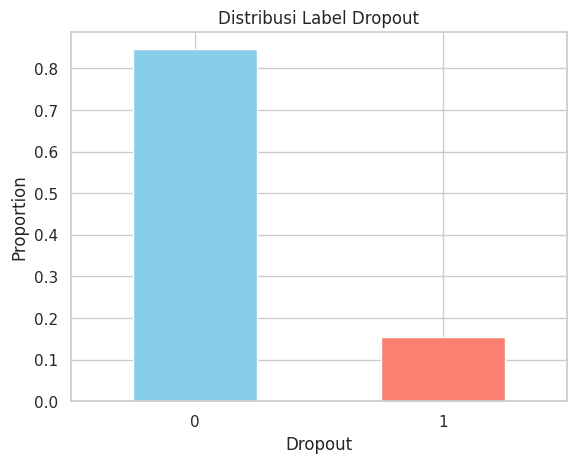

In [ ]:
# Distribusi dropout
print(dropout_df['dropout'].value_counts())

# Visualisasi distribusi kelas
dropout_df['dropout'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Label Dropout')
plt.xlabel('Dropout')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

##Model Experiment lanjutan##

Melakukan modeling dengan menghapus kolom dropout

In [ ]:


# Pisahkan fitur dan target
X = dropout_df.drop(columns='dropout')
y = dropout_df['dropout']

# Encoding jika ada fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation dengan F1
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
print("F1 Score (CV):", cv_scores)
print("Mean CV F1:", cv_scores.mean())

# Fit model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

F1 Score (CV): [0.8        0.88235294 0.73333333 0.68965517 0.64516129]
Mean CV F1: 0.7501005474492355


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       110
           1       0.78      0.90      0.84        20

    accuracy                           0.95       130
   macro avg       0.88      0.93      0.90       130
weighted avg       0.95      0.95      0.95       130



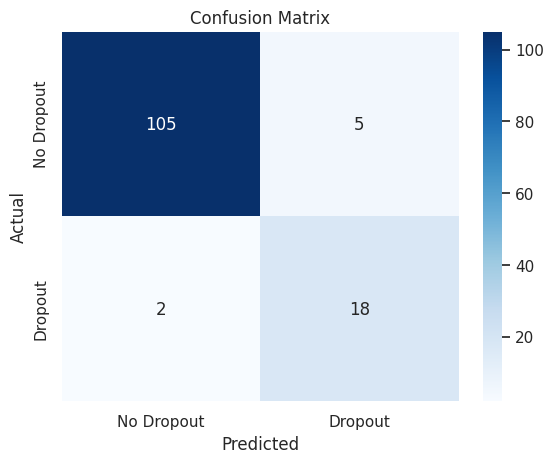

In [ ]:
# Evaluasi akhir
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'],
            yticklabels=['No Dropout', 'Dropout'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- melakukan modeling logistic regression dengan menghapus nilai akademik (kolom G1 dan G2)

In [ ]:
# Salin data awal (dropout_df) agar tidak mengubah aslinya
df_non_akademik = dropout_df.copy()

# Hapus fitur akademik: G1 dan G2 (G3 sudah dihapus sebelumnya pada tahap awal)
df_non_akademik = df_non_akademik.drop(columns=['G1', 'G2'])

# Pisahkan fitur dan target
X_non_akad = df_non_akademik.drop(columns='dropout')
y_non_akad = df_non_akademik['dropout']

# Encoding jika ada fitur kategorikal
X_non_akad = pd.get_dummies(X_non_akad, drop_first=True)

# Split stratified
X_train, X_test, y_train, y_test = train_test_split(
    X_non_akad, y_non_akad, test_size=0.2, stratify=y_non_akad, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling: Logistic Regression + Cross-Validation
model = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')

print("F1 Score (CV, non-akademik only):", cv_scores)
print("Mean CV F1:", cv_scores.mean())

# Fit & Predict
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluasi Akhir
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


F1 Score (CV, non-akademik only): [0.75862069 0.84848485 0.78571429 0.71428571 0.66666667]
Mean CV F1: 0.7547544409613375
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.82      0.90      0.86        20

    accuracy                           0.95       130
   macro avg       0.90      0.93      0.91       130
weighted avg       0.96      0.95      0.95       130



In [ ]:
# Train model dengan semua fitur non-akademik (sudah kita pakai di step 6)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

###Pengecekan model###

Mengurutkan fitur dari model

In [ ]:
# Ambil nama fitur dan koefisien model
feature_names = X_train.columns
coefficients = model.coef_[0]

# Buat DataFrame hasil pentingnya fitur
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)  # supaya bisa disortir berdasarkan pengaruh terbesar
})

# Urutkan berdasarkan nilai absolut koefisien (besar kecil pengaruhnya)
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Tampilkan top fitur yang paling penting
print(importance_df[['Feature', 'Coefficient']].head(15))  # bisa sesuaikan jumlah barisnya

            Feature  Coefficient
13        avg_grade    -5.320459
0               age    -0.646467
15        school_MS     0.538684
25       Fjob_other     0.423646
36   activities_yes    -0.275512
31  guardian_mother     0.266866
2              Fedu     0.252401
23     Mjob_teacher    -0.245837
1              Medu    -0.242177
20      Mjob_health     0.239263
5          failures     0.221902
17        address_U     0.217006
39     internet_yes     0.214638
24      Fjob_health     0.198844
40     romantic_yes     0.197652


Visualiasi fitur

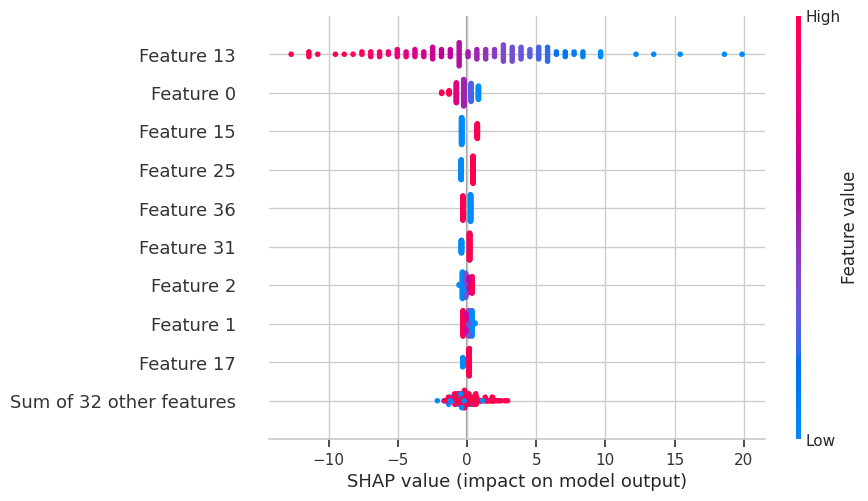

In [ ]:


# SHAP dengan linear explainer
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.plots.beeswarm(shap_values)

##Model Experiment lanjutan 2

Modeling dengan logistic regression

In [ ]:
# 1. Drop fitur akademik avg_grade
X_non_akademik = dropout_df.drop(columns=['dropout', 'avg_grade'])

# 2. Encoding fitur kategorikal
X_encoded = pd.get_dummies(X_non_akademik, drop_first=True)
y = dropout_df['dropout']

# 3. Train-test split dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

# 6. Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
print("F1 Score (CV, tanpa avg_grade):", cv_scores)
print("Mean CV F1:", cv_scores.mean())

# 7. Fit dan evaluasi di test set
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

F1 Score (CV, tanpa avg_grade): [0.8        0.82352941 0.68965517 0.59259259 0.64516129]
Mean CV F1: 0.7101876934187344
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       110
           1       0.74      0.85      0.79        20

    accuracy                           0.93       130
   macro avg       0.86      0.90      0.87       130
weighted avg       0.94      0.93      0.93       130



Modeling dengan RandoForestClassifier

In [ ]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation dengan F1-score
cv_rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print("F1 Score (CV, Random Forest):", cv_rf_scores)
print("Mean CV F1 (Random Forest):", cv_rf_scores.mean())

# Fit model
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluasi
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_rf_pred))

F1 Score (CV, Random Forest): [0.78571429 0.82352941 0.69230769 0.64       0.73333333]
Mean CV F1 (Random Forest): 0.7349769446240034

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       110
           1       0.81      0.65      0.72        20

    accuracy                           0.92       130
   macro avg       0.88      0.81      0.84       130
weighted avg       0.92      0.92      0.92       130



Pemilihan model

Setelah melakukan experiment dan evaluasi modeling dengan alogaritma yang berbeda, model yang dipilih 'logistic regression' dengan menggunakan fitur sosial.

##Penyimpanan Model Terpilih

In [ ]:
# Buat dictionary berisi semua komponen penting
pipeline_dict = {
    'model': model,                # logistic regression model
    'scaler': scaler,              # scaler yang dipakai
    'features': X.columns.tolist() # fitur yang dipakai saat training
}

# Simpan pipeline ke file
joblib.dump(pipeline_dict, 'dropout_prediction_pipeline.pkl')

print("Model & pipeline berhasil disimpan sebagai 'dropout_prediction_pipeline.pkl'")

Model & pipeline berhasil disimpan sebagai 'dropout_prediction_pipeline.pkl'


In [ ]:
# Load pipeline
loaded_pipeline = joblib.load('dropout_prediction_pipeline.pkl')

# Akses komponen
loaded_model = loaded_pipeline['model']
loaded_scaler = loaded_pipeline['scaler']
loaded_features = loaded_pipeline['features']

# Contoh prediksi untuk data baru (DataFrame dengan kolom sesuai fitur)
# new_data = pd.DataFrame([...])
# new_data_scaled = loaded_scaler.transform(new_data[loaded_features])
# prediction = loaded_model.predict(new_data_scaled)
